In [13]:
from sklearn.datasets import make_classification

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x,y= make_classification(n_samples=100 , n_features=2 , n_informative=1 , n_redundant=0 , n_classes=2 , n_clusters_per_class=1 , random_state=22 , hypercube=False , class_sep=10)

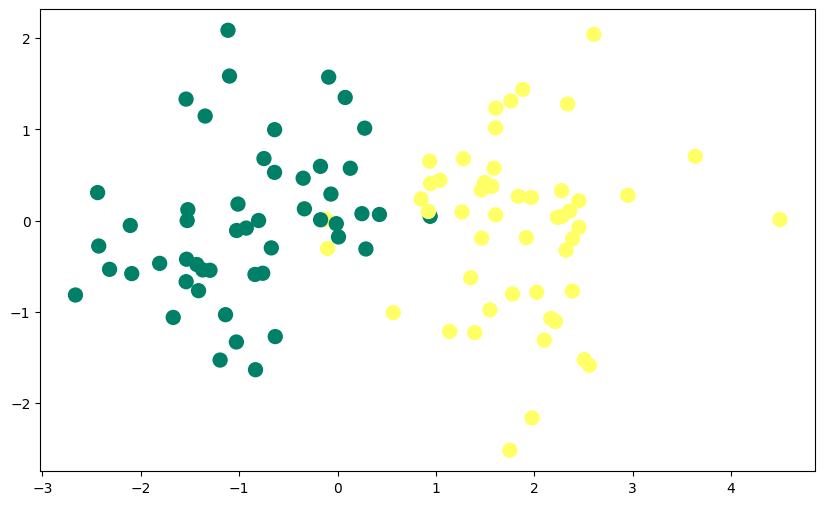

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] , x[:,1], c=y , cmap='summer' , s=100)

In [17]:
def step(z):
    return 1 if z>0 else 0

In [18]:
def perceptron(x,y):
    x=np.insert(x, 0,1, axis=1)
    weights=np.ones(x.shape[1])
    lr=1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat= step(np.dot(x[j] , weights))
        weights= weights + lr*(y[j]-y_hat)*x[j]
    
    return weights[0] , weights[1:]

In [19]:
intercept_ , coef_ = perceptron(x,y)

In [20]:
print(coef_)

[2.85950925 0.64786024]


In [21]:
print(intercept_)

0.0


In [22]:
m=-(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [23]:
x_input= np.linspace(-3,3 ,100)
y_input= m*x_input +b


(-3.0, 2.0)

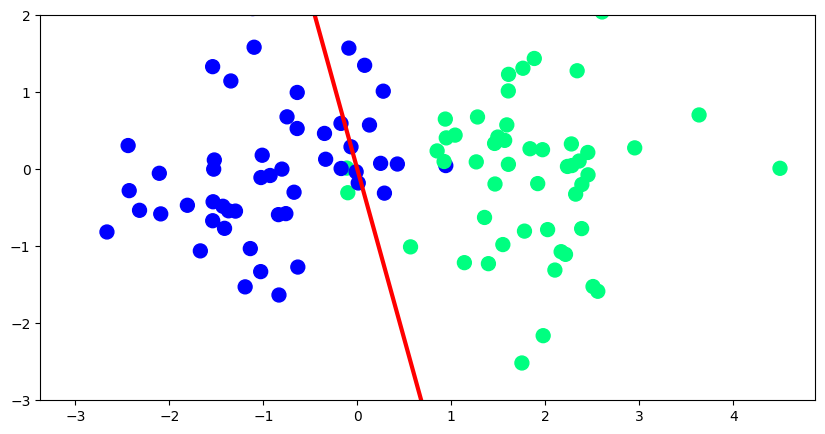

In [24]:
plt.figure(figsize=(10,5))
plt.plot(x_input , y_input , color='red' , linewidth=3)
plt.scatter(x[:,0] , x[:,1] , c=y, cmap='winter' , s=100)
plt.ylim(-3,2)

In [31]:
def perceptron(x,y):
    x=np.insert(x, 0,1, axis=1)
    weights=np.ones(x.shape[1])
    lr=1
    
    m=[]
    b=[]
    
    for i in range(200):
        j=np.random.randint(0,100)
        y_hat= step(np.dot(x[j] , weights))
        weights= weights + lr*(y[j]-y_hat)*x[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [32]:
m,b= perceptron(x,y)

In [40]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(x[:,0], x[:,1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, x_i*m[0] + b[0], 'r-', linewidth=2)
plt.xlim(-3,3)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>